<a href="https://colab.research.google.com/github/SaifuliAnna/DataScience_HW5/blob/main/Hw5_2_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Пусть все население ($N$ индивидов) делится на три группы: индивиды, которые восприимчивы к данной болезни, но здоровы (susceptible) — $S(t)$; зараженные индивиды (infected) — $I(t)$ (они больны сами и являются носителями болезни) и здоровые индивиды, обладающие иммунитетом к данной болезни (recovered) — $R(t)$.

Примем, что

(1)$$S(t)+I(t)+R(t)=N$$

Считаем, что когда число инфицированных превышает некое фиксированное значение $I^∗$, скорость изменения числа восприимчивых к болезни индивидов будет пропорционально числу самих восприимчивых индивидов.

(2)$${dS\over​dt}= -\alpha{S}$$

Теперь, когда каждый восприимчивый к болезни индивид в конце концов заболевает и становится инфекционным, то скорость изменения инфицированных индивидов это разность за единицу времени между вновь заболевшими и теми кто выздоравливает.

(3)$${dI\over​dt}= \alpha{S}-\beta{I}$$

Постоянные пропорциональности $α$ и $β$ называют коэффициентами заболеваемости и выздоровления соответственно.

Скорость изменения числа выздоравливающих индивидов:

(4)$${dR\over​dt}= \beta{I}$$

Для того, чтобы решения соответствующих уравнений определялись однозначно, необходимо задать начальные условия. Примем, что:


*   $α=0.5$
*   $β=0.3$
*   $N=1000000$
*   $S(0)=990000$
*   $I(0)=7000$
*   $R(0)=3000$
*   $t$0​, $t$f$​=0, 25$

Необходимо выполнить:


## 1.Решить дифференциальное уравнение (2) $${dS\over​dt}= -\alpha{S}$$и построить график функции $S(t)$

In [2]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

In [3]:
α = 0.5
𝛽 = 0.3
N0 = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0, tf = 0, 25

In [4]:
def dSdt(t, S):
    return ( - (α * S))

soln_s = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True)
print(soln_s)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fd3c1efab50>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


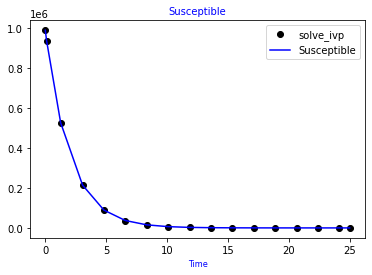

In [5]:
t_s, y_s = soln_s.t, soln_s.y[0]
z_s, = soln_s.sol(t_s)
plt.plot(t_s, y_s, 'o', color='k', label='solve_ivp')
plt.plot(t_s, z_s, color='blue', label='Susceptible')

plt.title('Susceptible', fontsize=10, color='blue')
plt.xlabel('Time', fontsize=8, color='blue') 

plt.legend()
plt.show()

## 2.Решить дифференциальное уравнение (3)$${dI\over​dt}= \alpha{S}-\beta{I}$$ и построить график функции $I(t)$

In [6]:
def dIdt(t, I):
    return ((α * soln_s.sol(t)) - (𝛽 * I))

soln_i = solve_ivp(dIdt, (t0, tf), [I0], dense_output=True)
print(soln_i)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fd3c1da6ac0>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08332734, 446699.01195851, 319077.83028019,
        165571.99131376,  71966.74863635,  29712.58392623,
         12130.57394035,   5009.75291414,   2075.26330114,
          1367.85128541]])
 y_events: None


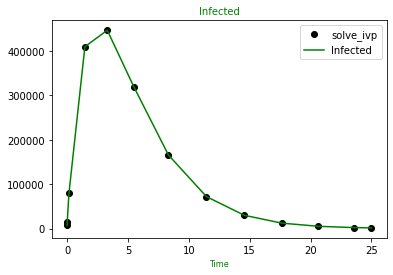

In [7]:
t_i, y_i = soln_i.t, soln_i.y[0]
z_i, = soln_i.sol(t_i)
plt.plot(t_i, y_i, 'o', color='k', label='solve_ivp')
plt.plot(t_i, z_i, color='green', label='Infected')

plt.title('Infected', fontsize=10, color='green')
plt.xlabel('Time', fontsize=8, color='green') 

plt.legend()
plt.show()

3.Используя решения уравнений (2) и (3), с помощью уравнения (1)$$S(t)+I(t)+R(t)=N$$, найти решение уравнения (4)$${dR\over​dt}= \beta{I}$$ (используйте интерполяцию $interp1d$) и построить график функции $R(t)$

In [8]:
R = N0 - soln_s.sol(soln_i.t)[0] - y_i
interp_r = interp1d(soln_i.t, R, kind='linear')

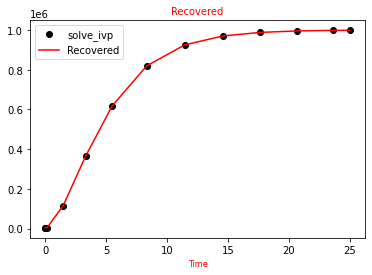

In [9]:
plt.plot(t_i, R, 'o', color='k', label='solve_ivp')
plt.plot(t_i, interp_r(t_i), color='red', label='Recovered')

plt.title('Recovered', fontsize=10, color='red')
plt.xlabel('Time', fontsize=8, color='red') 

plt.legend()
plt.show()

4.Построить все три графика $S(t)$, $I(t)$ и $R(t)$ на одной области отображения

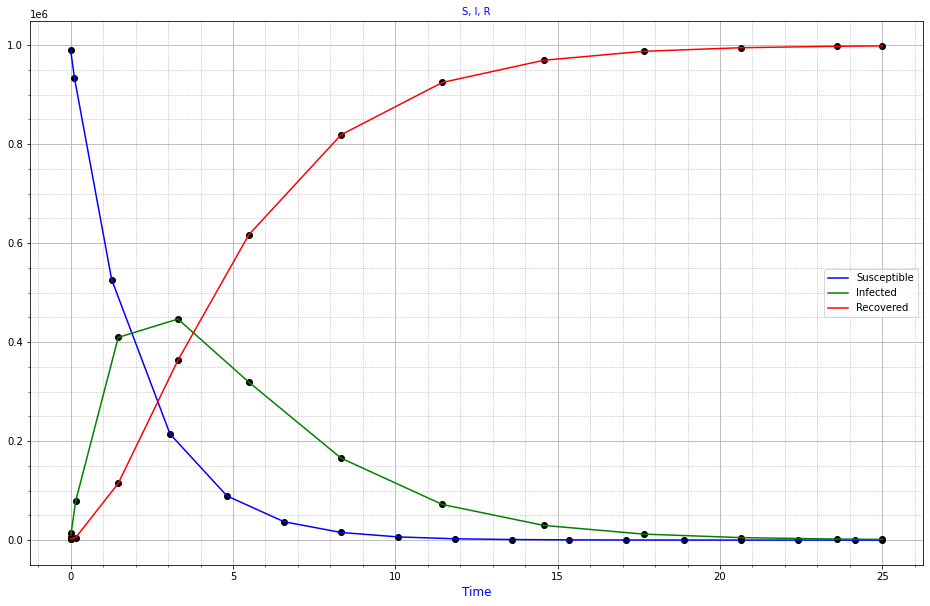

In [10]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.title('S, I, R', fontsize=10, color='blue')
plt.xlabel('Time', fontsize=12, color='blue') 

plt.plot(t_s, y_s, 'o', color='k')
plt.plot(t_s, z_s, color='blue', label='Susceptible')

plt.plot(t_i, y_i, 'o', color='k')
plt.plot(t_i, z_i, color='green', label='Infected')

plt.plot(t_i, R, 'o', color='k')
plt.plot(t_i, interp_r(t_i), color='red', label='Recovered')

plt.legend()
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');

# Вторая часть

Во вторая части прошлого домашнего задания мы решали дифференциальные уравнения и строили графики. Продолжаем работать над этой домашней работой дальше.

Необходимо методом наименьших квадратов:


*   для набора данных графика функции $S(t)$ получить уравнение вида $$S(t)=S_0e^{−αt}$$
*   для набора данных графика функции $I(t)$ получить уравнение вида $$I(t)=(I_0+αS_0t)e^{−αt}$$

Для уравнения $R(t)$ график функции будет $R(t)=N−S(t)−I(t)$



*   Построить все три графика $S(t)$, $I(t)$ и $R(t)$ на одной области отображения полученные методом наименьших квадратов
*   Найти время $t_{max​}$ при котором число инфекционных индивидов максимально. Надо с помощью метода $minimize_scalar$ найти когда функция $I(t)$ достигает своего максимума.





In [11]:
from scipy.optimize import leastsq, minimize_scalar

import numpy as np
import matplotlib.pyplot as plt

# from math import exp, pi

In [12]:
t = np.linspace(0, 25, 17)

In [13]:
t

array([ 0.    ,  1.5625,  3.125 ,  4.6875,  6.25  ,  7.8125,  9.375 ,
       10.9375, 12.5   , 14.0625, 15.625 , 17.1875, 18.75  , 20.3125,
       21.875 , 23.4375, 25.    ])

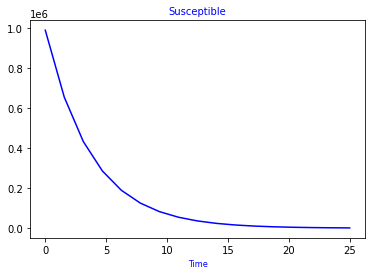

In [14]:
def func_s(t, a):
    return (S0 * np.exp(-a * t))

def diff_s(p, y, t):
    a = p
    return y - func_s(t, a)

sol_s, _ = leastsq(diff_s, (1), args=(y_s, t))
sol_s

plt.plot(t, func_s(t, sol_s[0]), color='blue')

plt.title('Susceptible', fontsize=10, color='blue')
plt.xlabel('Time', fontsize=8, color='blue') 

plt.show()

In [15]:
# def func_i(t, a):
#     return ((I0 + a * S0 * t) * np.exp(-a * t))

# def diff_i(p, y, t):
#     a = p
#     return y - func_i(t, a)

# sol_i, _ = leastsq(diff_i, (1), args=(y, t))
# sol_i

# plt.plot(t, func_i(t, sol_i[0]), color='green')

# plt.title('Infected', fontsize=10, color='green')
# plt.xlabel('Time', fontsize=8, color='green') 

# plt.show()

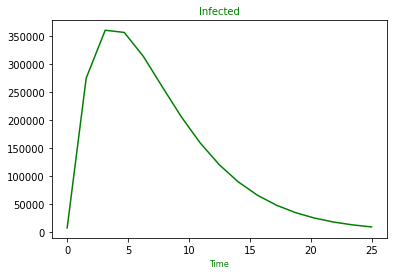

In [16]:
def func_i(t, a):
    return ((I0 + a * S0 * t) * np.exp(-a * t))

plt.plot(t, func_i(t, sol_s[0]), color='green')

plt.title('Infected', fontsize=10, color='green')
plt.xlabel('Time', fontsize=8, color='green') 

plt.show()

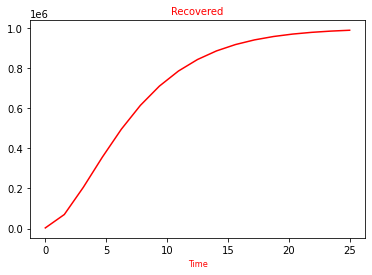

In [17]:
R = N0 - func_s(t, sol_s[0]) - func_i(t, sol_s[0])
# R

plt.plot(t, R, color='red')

plt.title('Recovered', fontsize=10, color='red')
plt.xlabel('Time', fontsize=8, color='red') 

plt.show()

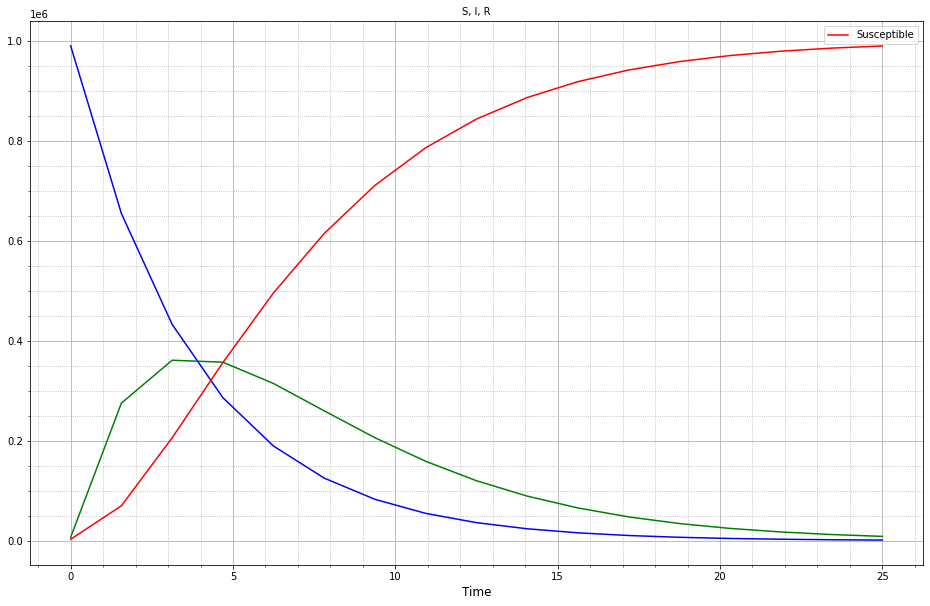

In [18]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.title('S, I, R', fontsize=10, color='k')
plt.xlabel('Time', fontsize=12, color='k') 

plt.plot(t, func_s(t, sol_s[0]), color='blue')

plt.plot(t, func_i(t, sol_s[0]), color='green')

plt.plot(t, R, color='red', label='Susceptible')

plt.legend()
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');

In [26]:
result = minimize_scalar(lambda t: -func_i(t, sol_s[0]), bounds=(0, 5))
result

     fun: -366784.9284305365
    nfev: 17
     nit: 9
 success: True
       x: 3.75189518192403